In [1]:
from importlib.resources import files
from Consensus import *

In [2]:
EXAMPLE_TREES_PATH = files("Consensus.example_data").joinpath("GTRgamma_edit.nex")
EXAMPLE_ASTRAL_TREE_PATH = files("Consensus.example_data").joinpath("astral_GTRgamma.tre")

In [3]:
from Consensus import *
import ete3
import dendropy

In [4]:
input_trees = TreeList_with_support.get(path = EXAMPLE_TREES_PATH, schema = "nexus")
majority = input_trees.majority_rule_consensus()
majority.compute_branch_support(treelist=input_trees)
majority.compute_transfer_support(treelist=input_trees)

In [5]:
for edge in majority.postorder_edge_iter():
    edge.branch_support = None
    edge.annotations.add_bound_attribute("branch_support")
    edge.transfer_support = None
    edge.annotations.add_bound_attribute("transfer_support")
for edge in majority.postorder_edge_iter():
    edge.branch_support = majority.branch_support[int(edge.bipartition)]
    edge.transfer_support = majority.transfer_support[int(edge.bipartition)]
    #print(majority.branch_support[0x32901e480])

## length as support 
for edge in majority.postorder_edge_iter():
    edge.length = majority.branch_support[int(edge.bipartition)]

## outputの確認

In [6]:
majority.as_string(schema='newick',suppress_annotations=True)

'[&U] (S1:1.0[&branch_support=1.0,transfer_support=1.0],S2:1.0[&branch_support=1.0,transfer_support=1.0],(S3:1.0[&branch_support=1.0,transfer_support=1.0],((S7:1.0[&branch_support=1.0,transfer_support=1.0],S8:1.0[&branch_support=1.0,transfer_support=1.0],((S11:1.0[&branch_support=1.0,transfer_support=1.0],S12:1.0[&branch_support=1.0,transfer_support=1.0]):0.989[&branch_support=0.989,transfer_support=0.989],(S9:1.0[&branch_support=1.0,transfer_support=1.0],S10:1.0[&branch_support=1.0,transfer_support=1.0]):0.885[&branch_support=0.885,transfer_support=0.885]):0.828[&branch_support=0.828,transfer_support=0.9013333333333341],(S4:1.0[&branch_support=1.0,transfer_support=1.0],S5:1.0[&branch_support=1.0,transfer_support=1.0],S6:1.0[&branch_support=1.0,transfer_support=1.0]):0.844[&branch_support=0.844,transfer_support=0.912]):1.0[&branch_support=1.0,transfer_support=1.0],((S35:1.0[&branch_support=1.0,transfer_support=1.0],((S91:1.0[&branch_support=1.0,transfer_support=1.0],S92:1.0[&branch_sup

In [7]:
majority.length

<bound method Tree.length of <Tree_with_support object at 0x31a539670>>

In [8]:
majority.write(
        path='trees.xml',
        schema='nexml',
        ignore_unrecognized_keyword_arguments=False,
        )

## 再度木の読み込み〜描画まで

In [9]:
newtree = dendropy.Tree.get(path="trees.xml",schema="nexml")
print(newtree.as_string(schema='nexml'))

<?xml version="1.0" encoding="ISO-8859-1"?>
<nex:nexml
    version="0.9"
    xsi:schemaLocation="http://www.nexml.org/2009 ../xsd/nexml.xsd"
    xmlns:dendropy="http://pypi.org/project/DendroPy/"
    xmlns="http://www.nexml.org/2009"
    xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
    xmlns:xml="http://www.w3.org/XML/1998/namespace"
    xmlns:nex="http://www.nexml.org/2009"
    xmlns:xsd="http://www.w3.org/2001/XMLSchema#"
>
    <otus id="d0">
        <otu id="d1" label="S1" />
        <otu id="d2" label="S2" />
        <otu id="d3" label="S3" />
        <otu id="d4" label="S4" />
        <otu id="d5" label="S5" />
        <otu id="d6" label="S6" />
        <otu id="d7" label="S7" />
        <otu id="d8" label="S8" />
        <otu id="d9" label="S9" />
        <otu id="d10" label="S10" />
        <otu id="d11" label="S11" />
        <otu id="d12" label="S12" />
        <otu id="d13" label="S13" />
        <otu id="d14" label="S14" />
        <otu id="d15" label="S15" />
     

In [10]:
majority2 = Tree_with_support(newtree)

In [11]:
majority2.branch_support = get_support_from_NeXML(newtree,"branch_support")

In [12]:
majority2.transfer_support = get_support_from_NeXML(newtree,"transfer_support")

In [13]:
string=majority2.as_string(schema='newick',suppress_rooting=True)

In [14]:
t = ete3.Tree(string)
ts=ete3.TreeStyle()

In [15]:
color = ["#006BA4", "#FF800E", "#ABABAB", "#595959",
                 "#5F9ED1", "#C85200", "#898989", "#A2C8EC", "#FFBC79", "#CFCFCF"]
_ = get_support(t,majority2.taxon_namespace,majority2.branch_support,pos = 0,leaf_support = False)
ts.legend.add_face(ete3.TextFace("branch_support",fgcolor=color[0]), column=0)
_ = get_support(t,majority2.taxon_namespace,majority2.transfer_support,pos = 1,leaf_support = False)
ts.legend.add_face(ete3.TextFace("transfer_support",fgcolor=color[1]), column=0)

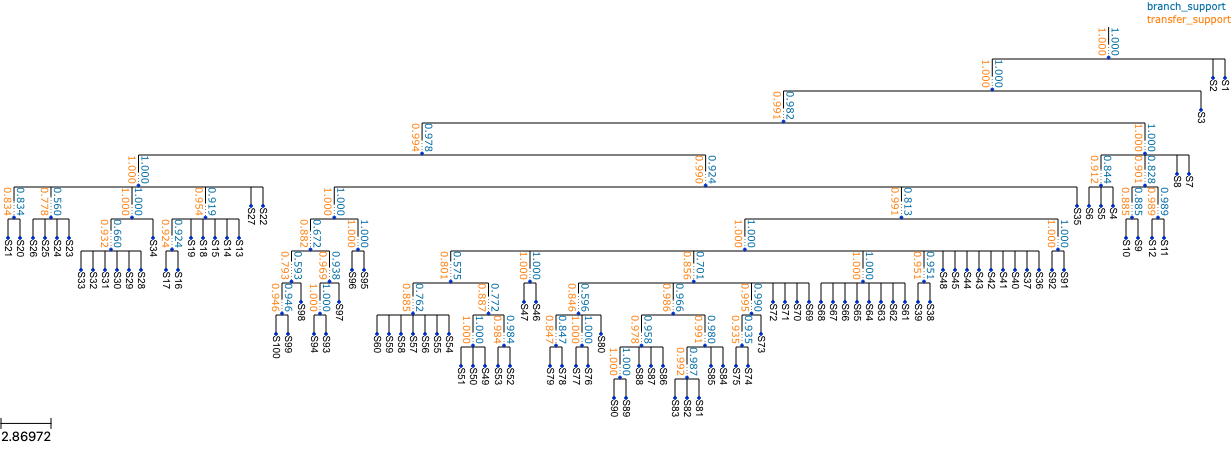

In [16]:
ts.rotation = 90
t.render(file_name="%%inline",tree_style=ts)